# Actividad: Análisis exploratorio con técnicas de agrupamiento
## Isaí Ambrocio - A01625101

Descarga el conjunto de datos socioeconómicos de los países del mundo, y haz lo siguiente:

In [ ]:
!pip install minisom

In [ ]:
pip install -U som-learn

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from minisom import MiniSom
from sklearn.cluster import DBSCAN, KMeans, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from somlearn import SOM

sns.set_theme()

In [79]:
df = pd.read_csv("/content/country_data.csv")

In [80]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [81]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

1. Aplica k-medias sobre le conjunto de datos para generar un agrupamiento para los países de la base de datos. Utiliza al menos dos métodos para estimar el número óptimo de grupos.


### Elbow Method

El método del codo consiste en graficar la inercia de los clusters contra el número de clusters. La inercia es una medida de la dispersión de los datos dentro de los clusters. El número de clusters óptimo es el punto en el que la inercia comienza a disminuir rápidamente. En este caso, el número óptimo de clusters es 4.

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df.iloc[:, 1:])
    inertia.append(kmeans.inertia_)

La inercia mide la suma de las distancias al cuadrado de cada punto dentro de su propio grupo al centroide de ese grupo.

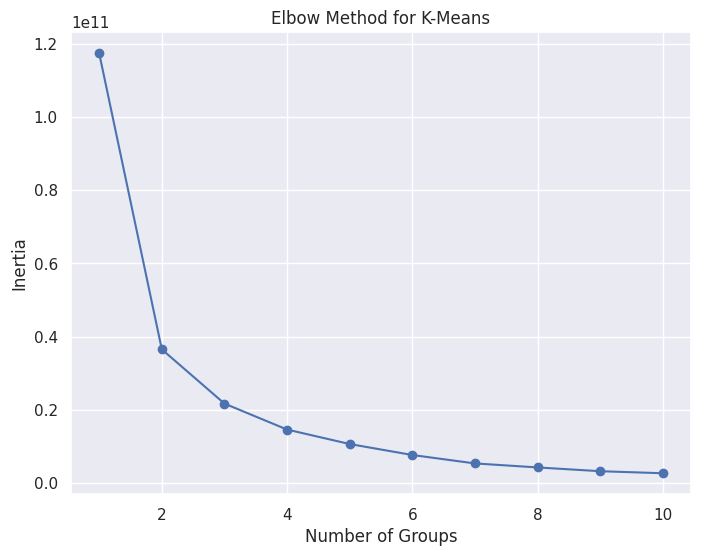

In [83]:
plt.figure(figsize = (8, 6))
plt.plot(range(1, 11), inertia, marker = "o")
plt.xlabel("Number of Groups")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.show()

### Silhouette Method

El método de la silueta calcula un coeficiente para cada punto de datos que representa qué tan bien se ajusta a su cluster asignado. Los valores del coeficiente de la silueta oscilan entre -1 y 1. Un valor alto indica que el punto de datos se ajusta bien a su cluster asignado.

In [ ]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    cluster_labels = kmeans.fit_predict(df.iloc[:, 1:])
    silhouette_avg = silhouette_score(df.iloc[:, 1:], cluster_labels)
    silhouette_scores.append(silhouette_avg)

In [85]:
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2

In [ ]:
kmeans = KMeans(n_clusters = optimal_k, random_state = 42)
df["cluster_kmeans"] = kmeans.fit_predict(df.iloc[:, 1:])

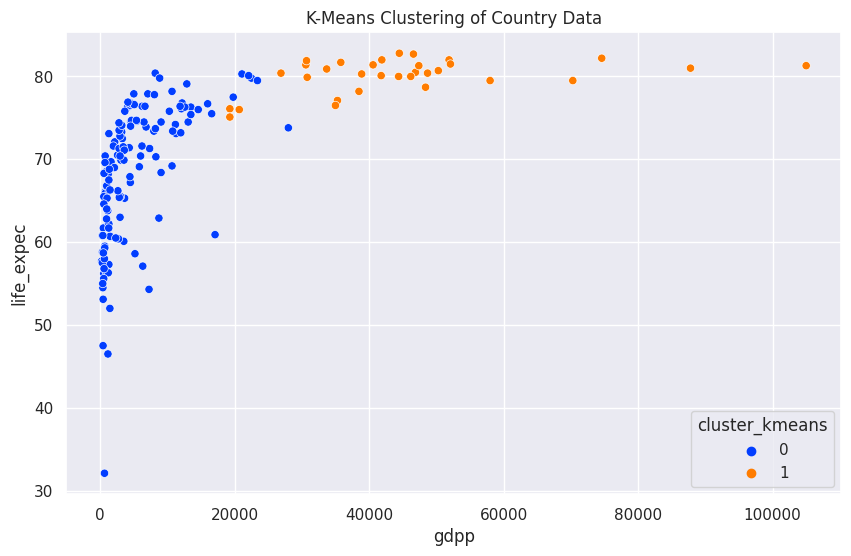

In [87]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x = "gdpp",
    y = "life_expec",
    hue = "cluster_kmeans",
    data = df,
    palette = sns.color_palette("bright", optimal_k),
)
plt.title("K-Means Clustering of Country Data")
plt.show()

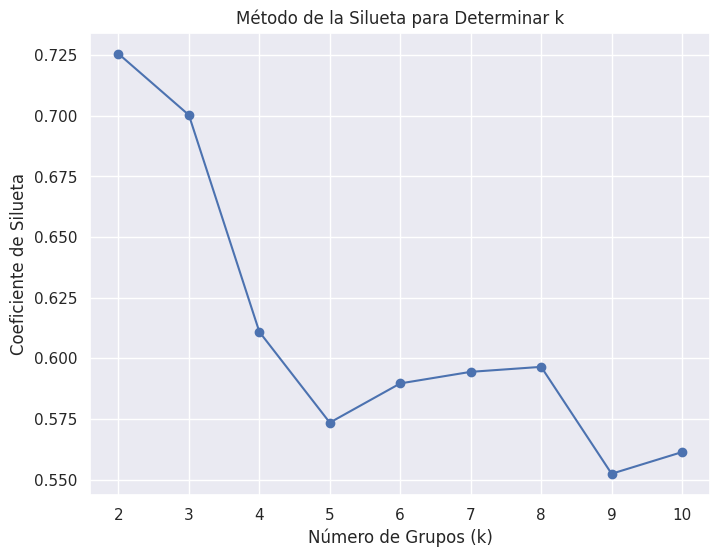

In [88]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker="o")
plt.xlabel("Número de Grupos (k)")
plt.ylabel("Coeficiente de Silueta")
plt.title("Método de la Silueta para Determinar k")
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

2. Repita lo anterior, pero con otro método de agrupamiento que elijas.

### DBSCAN

In [123]:
eps_listps_list = np.arange(0.1, 10, 0.1)
silhouette_scores = []

In [124]:
for eps in eps_list:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    cluster_labels = dbscan.fit_predict(df.iloc[:, 1:])


    unique_labels = np.unique(cluster_labels)
    if len(unique_labels) > 1:
        silhouette_avg = silhouette_score(df.iloc[:, 1:], cluster_labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(0.0)

In [125]:
optimal_eps = eps_list[np.argmax(silhouette_scores)]

dbscan = DBSCAN(eps=optimal_eps, min_samples=5)
cluster_labels = dbscan.fit_predict(df.iloc[:, 1:])

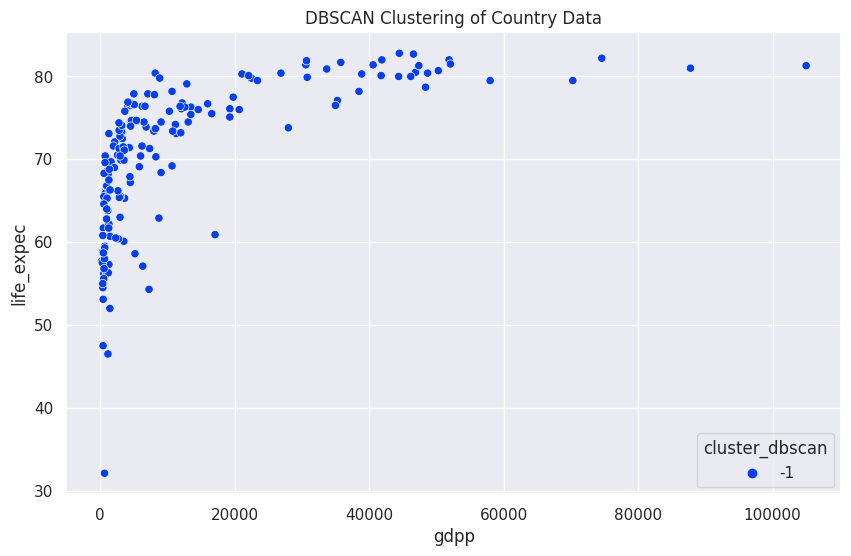

In [126]:
df["cluster_dbscan"] = cluster_labels
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="gdpp",
    y="life_expec",
    hue="cluster_dbscan",
    data=df,
    palette=sns.color_palette("bright", len(np.unique(cluster_labels))),
)
plt.title("DBSCAN Clustering of Country Data")
plt.show()


## MiniSom

In [ ]:
pip install -U som-learn

In [91]:
country_name = df["country"].copy()

In [62]:
som = SOM(n_columns=2, n_rows=2, random_state=1)
etiquetas = som.fit_predict(df)
print(etiquetas)

[1 2 0 1 2 0 0 3 3 0 2 3 0 2 2 3 0 1 0 0 2 0 0 3 2 1 1 0 1 3 0 1 1 2 0 0 1
 1 1 2 1 2 3 2 3 0 0 0 0 1 1 2 0 3 3 1 1 2 3 1 3 0 0 1 1 0 1 2 3 0 0 0 1 3
 3 3 0 3 0 0 1 1 3 0 1 2 2 1 1 2 2 3 2 1 1 2 2 1 2 1 2 1 2 0 2 0 1 0 1 0 3
 3 1 1 3 3 1 2 0 0 0 2 2 3 2 0 1 0 3 1 2 2 1 3 2 2 1 0 2 3 0 0 1 0 3 3 0 1
 2 1 1 0 2 0 0 1 2 3 3 3 2 0 0 0 2 1 1]


In [96]:
etiquetas = pd.DataFrame(etiquetas)
data_som = pd.concat([df, etiquetas], axis = 1)
data_som

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans,cluster_dbscan,0
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,-1,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,-1,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,-1,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,-1,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,-1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,-1,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,-1,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,-1,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,-1,1


In [119]:
for j in range(1, 5):
  print("========================")
  print(f"Cluster: {j}", "\nPaises: \t")
  for i in range (len(data_som)):
    if data_som.iloc[i][0] == j:
      print("\t",data_som.iloc[i]["country"],"\t")

Cluster: 1 
Paises: 	
	 Afghanistan 	
	 Angola 	
	 Benin 	
	 Burkina Faso 	
	 Burundi 	
	 Cameroon 	
	 Central African Republic 	
	 Chad 	
	 Comoros 	
	 Congo, Dem. Rep. 	
	 Congo, Rep. 	
	 Cote d'Ivoire 	
	 Equatorial Guinea 	
	 Eritrea 	
	 Gabon 	
	 Gambia 	
	 Ghana 	
	 Guinea 	
	 Guinea-Bissau 	
	 Haiti 	
	 Iraq 	
	 Kenya 	
	 Kiribati 	
	 Lao 	
	 Lesotho 	
	 Liberia 	
	 Madagascar 	
	 Malawi 	
	 Mali 	
	 Mauritania 	
	 Micronesia, Fed. Sts. 	
	 Mozambique 	
	 Namibia 	
	 Niger 	
	 Nigeria 	
	 Pakistan 	
	 Rwanda 	
	 Senegal 	
	 Sierra Leone 	
	 Solomon Islands 	
	 Sudan 	
	 Tanzania 	
	 Timor-Leste 	
	 Togo 	
	 Uganda 	
	 Yemen 	
	 Zambia 	
Cluster: 2 
Paises: 	
	 Albania 	
	 Antigua and Barbuda 	
	 Bahamas 	
	 Barbados 	
	 Belarus 	
	 Bosnia and Herzegovina 	
	 Bulgaria 	
	 Chile 	
	 Costa Rica 	
	 Croatia 	
	 Czech Republic 	
	 Estonia 	
	 Georgia 	
	 Hungary 	
	 Latvia 	
	 Lebanon 	
	 Libya 	
	 Lithuania 	
	 Macedonia, FYR 	
	 Malaysia 	
	 Maldives 	
	 Malta 	
	 Mauritius 	
	 Mol

In [109]:
df.drop(["country"], inplace=True, axis=1)

In [120]:
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(df)

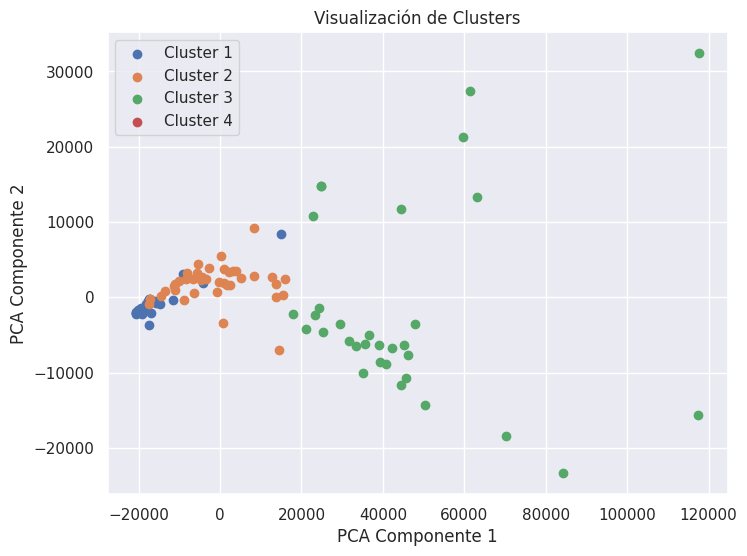

In [121]:
plt.figure(figsize=(8, 6))

for cluster_id in range(1, 5):
    cluster_points = data_reduced[data_som.iloc[:, -1] == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id}")

plt.xlabel("PCA Componente 1")
plt.ylabel("PCA Componente 2")
plt.title("Visualización de Clusters")
plt.legend()
plt.show()

Tal como lo pensaba, los países que reciben un mayor ingreso tienen una esperanza de vida más alta. Podemos observar que existe una correlación negativa entre el ingreso y la tasa de mortalidad infantil. Esto significa que los países con ingresos más altos tienden a tener tasas de mortalidad infantil más bajas.
También, los países con ingresos más altos tienden a tener tasas de fecundidad total más bajas.

Por otro lado, vemos que hay ciertas variaciones en las diferentes técnicas de agrupamiento cuál es normal, ya que hay técnicas que son mejores para ciertos tipos de datos o análisis y no hay alguno que sea perfecto para todos los casos. Por esto es importante explorar y conocer las diferentes técnicas para saber cuál es la mejor manera de abordar un problema.